# Group Project Proposal

## Title: Classification Model to Predict Fraudulent Firms Based on Audit Data

## Introduction

#### Background Information
Our group project is dedicated to build a classification model to help auditors classify whether a firm is fraudulent or not based on the data that we have. Data audits are performed to solve a specific problem or to meet certain goals related to the data set. Data auditing focuses on key metrics beyond quantity to conclude the data set. The audit data can be used to evaluate the quality, safety, and compliance of various objects. 
 
The data set that we have chosen is the Audit Data, which can be found at this link: https://archive.ics.uci.edu/dataset/475/audit+data.

#### Question to be Answered with Our Project
Can we predict whether or not a firm is fraudulent based on the known variables?
- The purpose of the our group project is to help auditors by building a classification model that can predict fraudulent companies based on current and historical risk factors, which can be referenced through the audit data set that we have chosen. 

#### Identification and Description of the Data Set 
We used the file named "audit_risk.csv" that we have acquired through the website for our data analysis. There were 27 variables listed in the data set, which are essentially the many risk factors that were examined from various areas. These risks include: the past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports, etc. After in-depth interview with the auditors, important risk factors were evaluated and their probability of existence is calculated from the present and past records.

## Preliminary Exploratory Data Analysis

#### Loading the necessary libraries into the Jupyter Notebook:

In [97]:
# loaded the necessary libraries
library(tidyverse)
library(tidymodels)
library(dplyr)
library(repr)
library(magrittr)

#### Reading the dataset can be read from the web into R:

In [98]:
# demonstrate how the data is read into R 
audit <- read_csv("audit_data/audit_risk.csv") |> mutate(Risk = as_factor(Risk))
head(audit)

New names:
• `Score_B` -> `Score_B...7`
• `Score_B` -> `Score_B...11`
Rows: 776 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): LOCATION_ID
dbl (26): Sector_score, PARA_A, Score_A, Risk_A, PARA_B, Score_B...7, Risk_B...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B...7,Risk_B,TOTAL,numbers,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.4,0,0.2,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.4,0,0.2,0,2.0,1.548,0.4,0.5,0.3096,0
3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6,⋯,0.4,0,0.2,0,4.4,17.530,0.4,0.5,3.5060,1
3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5,⋯,0.4,0,0.2,0,2.0,1.416,0.4,0.5,0.2832,0
3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5,⋯,0.4,0,0.2,0,2.0,2.156,0.4,0.5,0.4312,0



#### Cleaning and wrangling the data into a tidy format:

In [99]:
# first, we take a glimpse of the existing columns
glimpse(audit)

# since there was a duplicate of the probability column, we remove one of them
audit <- audit |> select(-Prob)

# cleaning and wrangling the data into a tidy format: tidying the column names
colnames(audit) %<>% tolower
head(audit)

Rows: 776
Columns: 27
$ Sector_score   <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3…
$ LOCATION_ID    <chr> "23", "6", "6", "6", "6", "6", "7", "8", "8", "8", "8",…
$ PARA_A         <dbl> 4.18, 0.00, 0.51, 0.00, 0.00, 0.00, 1.10, 8.50, 8.40, 3…
$ Score_A        <dbl> 0.6, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.6, 0.6, 0.6, 0.6, …
$ Risk_A         <dbl> 2.508, 0.000, 0.102, 0.000, 0.000, 0.000, 0.440, 5.100,…
$ PARA_B         <dbl> 2.50, 4.83, 0.23, 10.80, 0.08, 0.83, 7.41, 12.03, 11.05…
$ Score_B...7    <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.4, 0.6, 0.6, 0.2, 0.6, …
$ Risk_B         <dbl> 0.500, 0.966, 0.046, 6.480, 0.016, 0.166, 2.964, 7.218,…
$ TOTAL          <dbl> 6.68, 4.83, 0.74, 10.80, 0.08, 0.83, 8.51, 20.53, 19.45…
$ numbers        <dbl> 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.5, 5.5, 5.0, 5.0, …
$ Score_B...11   <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, …
$ Risk_C         <dbl> 1.0, 1.0, 1.0, 3.6, 1.0, 1.0, 1.0, 2.2, 2.2, 1.0, 1.0, …
$ Money_Value    <

sector_score,location_id,para_a,score_a,risk_a,para_b,score_b...7,risk_b,total,numbers,⋯,prob,risk_e,history,risk_f,score,inherent_risk,control_risk,detection_risk,audit_risk,risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.2,0.4,0,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.2,0.4,0,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.2,0.4,0,0,2.0,1.548,0.4,0.5,0.3096,0
3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6,⋯,0.2,0.4,0,0,4.4,17.530,0.4,0.5,3.5060,1
3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5,⋯,0.2,0.4,0,0,2.0,1.416,0.4,0.5,0.2832,0
3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5,⋯,0.2,0.4,0,0,2.0,2.156,0.4,0.5,0.4312,0


#### Taking a glimpse of the number of observations in each class:

In [100]:
# taking a glimpse of the audit data set 
glimpse(audit)

Rows: 776
Columns: 26
$ sector_score   <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3…
$ location_id    <chr> "23", "6", "6", "6", "6", "6", "7", "8", "8", "8", "8",…
$ para_a         <dbl> 4.18, 0.00, 0.51, 0.00, 0.00, 0.00, 1.10, 8.50, 8.40, 3…
$ score_a        <dbl> 0.6, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.6, 0.6, 0.6, 0.6, …
$ risk_a         <dbl> 2.508, 0.000, 0.102, 0.000, 0.000, 0.000, 0.440, 5.100,…
$ para_b         <dbl> 2.50, 4.83, 0.23, 10.80, 0.08, 0.83, 7.41, 12.03, 11.05…
$ score_b...7    <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.4, 0.6, 0.6, 0.2, 0.6, …
$ risk_b         <dbl> 0.500, 0.966, 0.046, 6.480, 0.016, 0.166, 2.964, 7.218,…
$ total          <dbl> 6.68, 4.83, 0.74, 10.80, 0.08, 0.83, 8.51, 20.53, 19.45…
$ numbers        <dbl> 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.5, 5.5, 5.0, 5.0, …
$ score_b...11   <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, …
$ risk_c         <dbl> 1.0, 1.0, 1.0, 3.6, 1.0, 1.0, 1.0, 2.2, 2.2, 1.0, 1.0, …
$ money_value    <

#### Splitting the data set into training and test sets:

In [101]:
# split the audit data into training and test set
audit_split <- initial_split(audit, prop = 0.75, strata = risk)

audit_training <- training(audit_split)

audit_testing <- testing(audit_split)

#### Viewing and taking a glimpse of the training data set:

In [102]:
# split the audit data into training and test set
head(audit_training)
glimpse(audit_training)

sector_score,location_id,para_a,score_a,risk_a,para_b,score_b...7,risk_b,total,numbers,⋯,prob,risk_e,history,risk_f,score,inherent_risk,control_risk,detection_risk,audit_risk,risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.2,0.4,0,0,2.0,1.5480,0.4,0.5,0.30960,0
3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5,⋯,0.2,0.4,0,0,2.0,1.4160,0.4,0.5,0.28320,0
3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5,⋯,0.2,0.4,0,0,2.0,2.1560,0.4,0.5,0.43120,0
3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5,⋯,0.2,0.4,0,0,2.4,4.3720,0.4,0.5,0.87440,0
3.89,8,1.09,0.4,0.436,0.35,0.2,0.070,1.44,5,⋯,0.2,0.4,0,0,2.2,1.9060,0.4,0.5,0.38120,0
3.89,8,0.00,0.2,0.000,0.84,0.2,0.168,0.84,5,⋯,0.2,0.4,0,0,2.0,1.5694,0.4,0.5,0.31388,0


Rows: 581
Columns: 26
$ sector_score   <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3…
$ location_id    <chr> "6", "6", "6", "8", "8", "8", "37", "3", "3", "4", "14"…
$ para_a         <dbl> 0.51, 0.00, 0.00, 3.98, 1.09, 0.00, 1.81, 0.02, 0.94, 0…
$ score_a        <dbl> 0.2, 0.2, 0.2, 0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, …
$ risk_a         <dbl> 0.102, 0.000, 0.000, 2.388, 0.436, 0.000, 0.724, 0.004,…
$ para_b         <dbl> 0.23, 0.08, 0.83, 0.99, 0.35, 0.84, 1.03, 5.94, 0.01, 1…
$ score_b...7    <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, …
$ risk_b         <dbl> 0.046, 0.016, 0.166, 0.198, 0.070, 0.168, 0.206, 2.376,…
$ total          <dbl> 0.74, 0.08, 0.83, 4.97, 1.44, 0.84, 2.84, 5.96, 0.95, 1…
$ numbers        <dbl> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5…
$ score_b...11   <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, …
$ risk_c         <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ money_value    <

#### Viewing and taking a glimpse of the testing data set:

In [103]:
# split the audit data into training and test set
head(audit_testing)
glimpse(audit_testing)

sector_score,location_id,para_a,score_a,risk_a,para_b,score_b...7,risk_b,total,numbers,⋯,prob,risk_e,history,risk_f,score,inherent_risk,control_risk,detection_risk,audit_risk,risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,⋯,0.2,0.4,0,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,⋯,0.2,0.4,0,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,⋯,0.2,0.4,0,0,4.2,18.034,0.4,0.5,3.6068,1
3.89,37,4.86,0.6,2.916,46.78,0.6,28.068,51.64,5.5,⋯,0.2,0.4,0,0,4.4,71.492,0.4,0.5,14.2984,1
3.89,14,6.85,0.6,4.110,31.76,0.6,19.056,38.61,5.0,⋯,0.2,0.4,0,0,3.6,24.858,0.4,0.5,4.9716,1
3.89,37,0.00,0.2,0.000,0.75,0.2,0.150,0.75,5.0,⋯,0.2,0.4,0,0,2.2,4.262,0.4,0.5,0.8524,0


Rows: 195
Columns: 26
$ sector_score   <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3…
$ location_id    <chr> "23", "6", "8", "37", "14", "37", "5", "20", "19", "19"…
$ para_a         <dbl> 4.18, 0.00, 8.50, 4.86, 6.85, 0.00, 0.00, 9.01, 11.95, …
$ score_a        <dbl> 0.6, 0.2, 0.6, 0.6, 0.6, 0.2, 0.2, 0.6, 0.6, 0.2, 0.4, …
$ risk_a         <dbl> 2.508, 0.000, 5.100, 2.916, 4.110, 0.000, 0.000, 5.406,…
$ para_b         <dbl> 2.50, 4.83, 12.03, 46.78, 31.76, 0.75, 0.05, 19.82, 30.…
$ score_b...7    <dbl> 0.2, 0.2, 0.6, 0.6, 0.6, 0.2, 0.2, 0.6, 0.6, 0.2, 0.2, …
$ risk_b         <dbl> 0.500, 0.966, 7.218, 28.068, 19.056, 0.150, 0.010, 11.8…
$ total          <dbl> 6.68, 4.83, 20.53, 51.64, 38.61, 0.75, 0.05, 28.83, 42.…
$ numbers        <dbl> 5.0, 5.0, 5.5, 5.5, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, …
$ score_b...11   <dbl> 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, …
$ risk_c         <dbl> 1.0, 1.0, 2.2, 2.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, …
$ money_value    <

#### Using only training data and summarize the data in one table with the chosen predictor variables:

In [104]:
# summarizing the training data--selecting the chosen predictor variables
audit_training <- audit_training |> select(total, money_value, district_loss, history, 
                                           prob, score, inherent_risk, control_risk, 
                                           detection_risk, audit_risk, risk)

glimpse(audit_training)
head(audit_training)

Rows: 581
Columns: 11
$ total          <dbl> 0.74, 0.08, 0.83, 4.97, 1.44, 0.84, 2.84, 5.96, 0.95, 1…
$ money_value    <dbl> 0.000, 0.000, 2.950, 1.930, 0.000, 0.007, 0.000, 0.010,…
$ district_loss  <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2…
$ history        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ prob           <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, …
$ score          <dbl> 2.0, 2.0, 2.0, 2.4, 2.2, 2.0, 2.2, 2.6, 2.0, 2.0, 2.0, …
$ inherent_risk  <dbl> 1.5480, 1.4160, 2.1560, 4.3720, 1.9060, 1.5694, 2.3300,…
$ control_risk   <dbl> 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, …
$ detection_risk <dbl> 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, …
$ audit_risk     <dbl> 0.30960, 0.28320, 0.43120, 0.87440, 0.38120, 0.31388, 0…
$ risk           <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…


total,money_value,district_loss,history,prob,score,inherent_risk,control_risk,detection_risk,audit_risk,risk
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.74,0.000,2,0,0.2,2.0,1.5480,0.4,0.5,0.30960,0
0.08,0.000,2,0,0.2,2.0,1.4160,0.4,0.5,0.28320,0
0.83,2.950,2,0,0.2,2.0,2.1560,0.4,0.5,0.43120,0
4.97,1.930,2,0,0.2,2.4,4.3720,0.4,0.5,0.87440,0
1.44,0.000,2,0,0.2,2.2,1.9060,0.4,0.5,0.38120,0
0.84,0.007,2,0,0.2,2.0,1.5694,0.4,0.5,0.31388,0


Based on the information provided on the website of the Audit Data and last time we had checked), we do not have missing values in our data set.

#### Using only training data and visualize the data with three plots relevant to the analysis:

Since we prefer 2-D plots for visualization, we choose three variables to help visualize for each plot. We have made four plots to get a good estimate of the predictor variables and the prediction model that we are building:

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


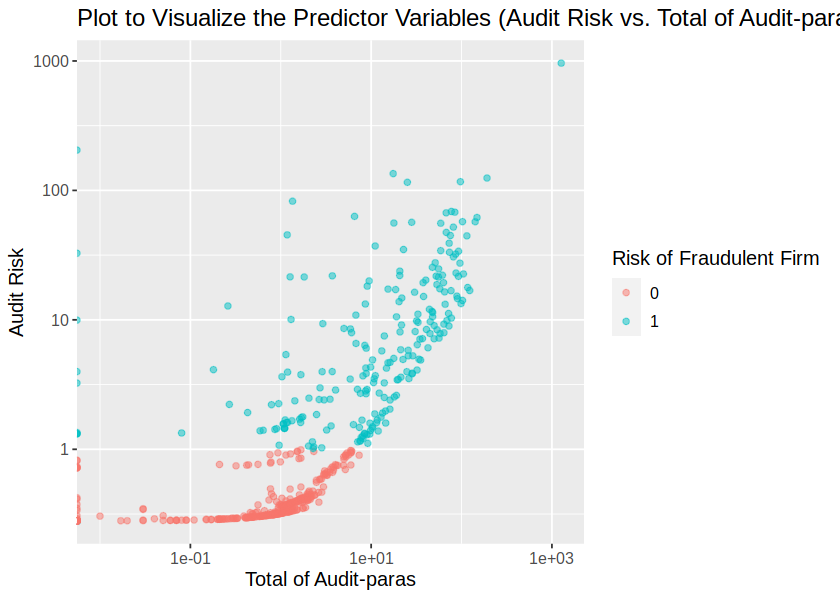

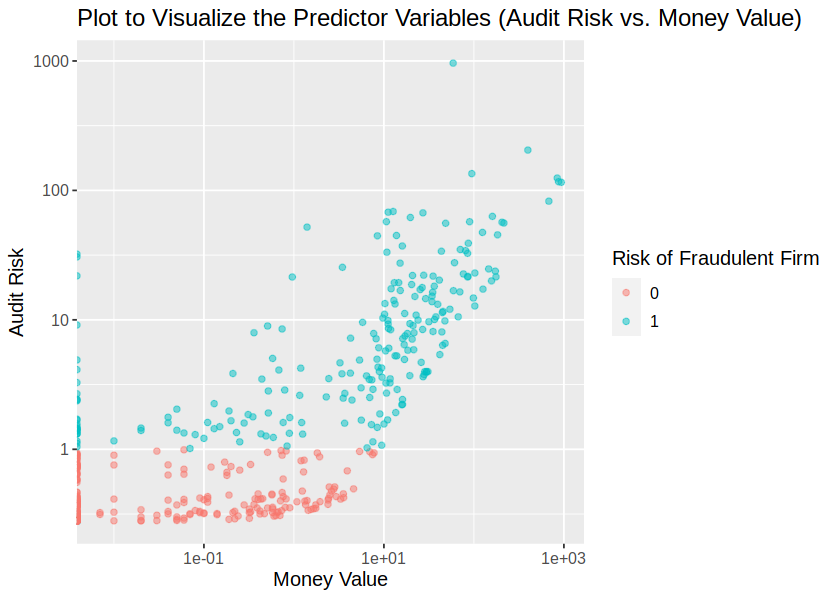

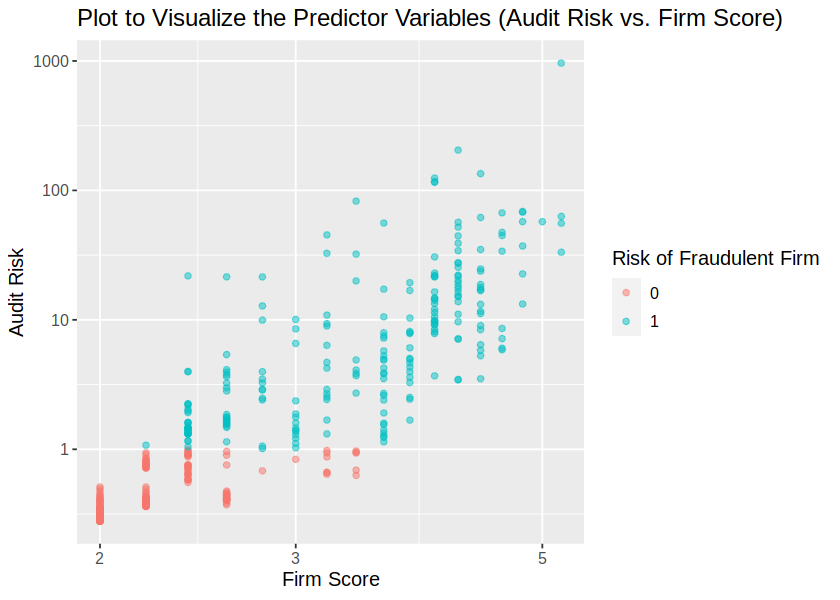

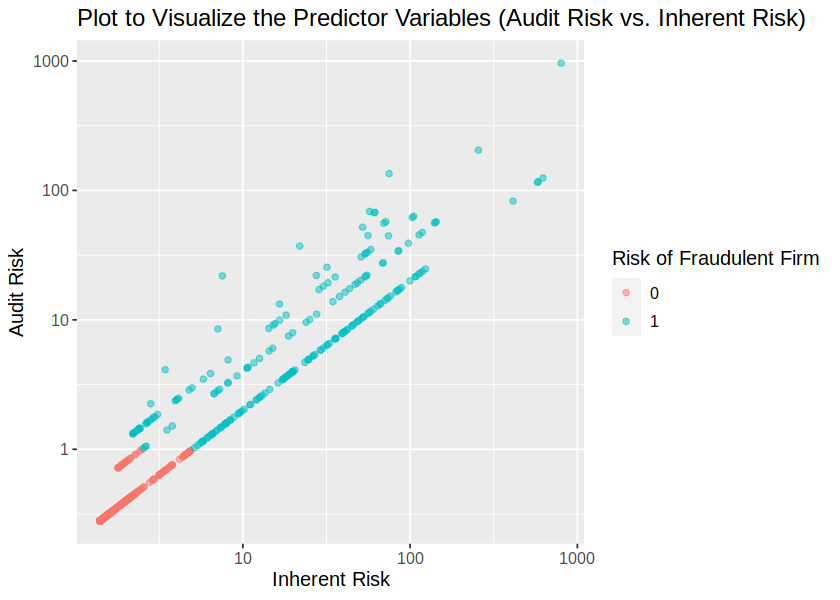

In [106]:
# using scatter plots to visualize
options(repr.plot.width = 7, repr.plot.height = 5)

audit_training_plot0 <- audit_training |> ggplot(aes(x = total, y = audit_risk, color = risk)) + 
                            geom_point(alpha = 0.5) + labs(x = "Total of Audit-paras", y = "Audit Risk", 
                                                        title = "Plot to Visualize the Predictor Variables (Audit Risk vs. Total of Audit-paras)", 
                                                        color = "Risk of Fraudulent Firm") + 
                            scale_x_log10() + scale_y_log10() +
                            theme(text = element_text(size = 12))
audit_training_plot0

audit_training_plot1 <- audit_training |> ggplot(aes(x = money_value, y = audit_risk, color = risk)) + 
                            geom_point(alpha = 0.5) + labs(x = "Money Value", y = "Audit Risk", 
                                                        title = "Plot to Visualize the Predictor Variables (Audit Risk vs. Money Value)", 
                                                        color = "Risk of Fraudulent Firm") + 
                            scale_x_log10() + scale_y_log10() +
                            theme(text = element_text(size = 12))
audit_training_plot1

audit_training_plot2 <- audit_training |> ggplot(aes(x = score, y = audit_risk, color = risk)) + 
                            geom_point(alpha = 0.5) + labs(x = "Firm Score", y = "Audit Risk", 
                                                        title = "Plot to Visualize the Predictor Variables (Audit Risk vs. Firm Score)", 
                                                        color = "Risk of Fraudulent Firm") + 
                            scale_x_log10() + scale_y_log10() +
                            theme(text = element_text(size = 12))
audit_training_plot2

audit_training_plot3 <- audit_training |> ggplot(aes(x = inherent_risk, y = audit_risk, color = risk)) + 
                            geom_point(alpha = 0.5) + labs(x = "Inherent Risk", y = "Audit Risk", 
                                                        title = "Plot to Visualize the Predictor Variables (Audit Risk vs. Inherent Risk)", 
                                                        color = "Risk of Fraudulent Firm") + 
                            scale_x_log10() + scale_y_log10() +
                            theme(text = element_text(size = 12))
audit_training_plot3

## Methods

- Firstly, we downloaded the data folder locally and pushed the files into our project’s GitHub repository. Then, we read in the csv file using the corresponding read_* function, which is read_csv.
- When loaded in, the data was in an almost-tidy format, as it meets almost all of the required conditions. Thus, we did only minor tidying steps: cleaning the names and deleting duplicate columns.
- From the data set chosen, we work with the training set and chose only 11 out of the 27 variables for further analysis, which are : total, money_value, district_loss, history, prob, score, inherent_risk, control_risk, detection_risk, audit_risk, risk. This is because we believe that these are the variables that are most reflective of the trend that we are trying to analyze and build our classification model from. Some of the other variables are somewhat stagnant, so they may not help with our analysis and building our classification model as much.
- Using the chosen variables, we visualized the existing patterns using scatter plots. However, since it is not very effective to visualize graphs in 3-dimensions or more, we have chosen a few variables that would show the existing relationships to help us picture how we would move on with building the classification model.

--> In the graphs, we could see the relationship between two variables, with the risk of fraudulent firms denoted by the different colors

## Expected Outcomes and Significance

#### Expected Outcomes:
By building this classification model, we are expecting to find--or to classify--fraudulent firms in the midst of non-fraudulent or non-suspicious ones. We also hope to find that our classification model would have a relatively high estimated accuracy, if possible, so that this model can be helpful for the auditors.

#### Possible Impact:
Such findings could contribute to the work of auditors. This would help immensely as they examine, analyze, and interpret accounting records  or audit and evaluate statements as they would immediately be able to classify whether the firm is fraudulent or not by using the model.

#### Possible Future Questions:
Since the data was collected in the year 2015 to 2016, possible future questions would include whether or not this classification model would still have the same estimated accuracy for the present or coming years.

##### Note: One of our group members (Xulan Zheng) did not make any contribution towards this assignment.